In [111]:
import numpy as np
import sympy as sp

w0_v = 8
bw_v = 3
k = int(15)

w0, bw = sp.symbols('w0 bw', real=True, positive=True)
s = sp.symbols('s', real=True)
num = bw**k + w0**k
den = (s+w0)**k + bw**k
# create a polynomial, get coeffs, simplify, replace w0 and bw and get coeffs again with new values
n_poly = sp.Poly(num, s)
d_poly = sp.Poly(den, s)
d_coeffs = d_poly.all_coeffs()
n_coeffs = n_poly.all_coeffs()

print('d_coeffs = ', d_coeffs)
for i in range(0, len(d_coeffs)):
    d_coeffs[i] = sp.simplify(sp.simplify(d_coeffs[i]).subs({w0: w0_v, bw: bw_v}))
for i in range(0, len(n_coeffs)):
    n_coeffs[i] = sp.simplify(sp.simplify(n_coeffs[i]).subs({w0: w0_v, bw: bw_v}))

num = n_coeffs
den = d_coeffs
print('num = ', n_coeffs)
print('den = ', d_coeffs)

print( type(num), type(den) )
print( type(num[0]), type(den[0]) )
# convert to float values
num = np.array(num).astype(np.float64)

d_coeffs =  [1, 15*w0, 105*w0**2, 455*w0**3, 1365*w0**4, 3003*w0**5, 5005*w0**6, 6435*w0**7, 6435*w0**8, 5005*w0**9, 3003*w0**10, 1365*w0**11, 455*w0**12, 105*w0**13, 15*w0**14, bw**15 + w0**15]
num =  [35184386437739]
den =  [1, 120, 6720, 232960, 5591040, 98402304, 1312030720, 13495173120, 107961384960, 671759728640, 3224446697472, 11725260718080, 31267361914880, 57724360458240, 65970697666560, 35184386437739]
<class 'list'> <class 'list'>
<class 'sympy.core.numbers.Integer'> <class 'sympy.core.numbers.One'>


H =  35184386437739.0/(-I*W**15 - 120*W**14 + 6720*I*W**13 + 232960*W**12 - 5591040*I*W**11 - 98402304*W**10 + 1312030720*I*W**9 + 13495173120*W**8 - 107961384960*I*W**7 - 671759728640*W**6 + 3224446697472*I*W**5 + 11725260718080*W**4 - 31267361914880*I*W**3 - 57724360458240*W**2 + 65970697666560*I*W + 35184386437739)


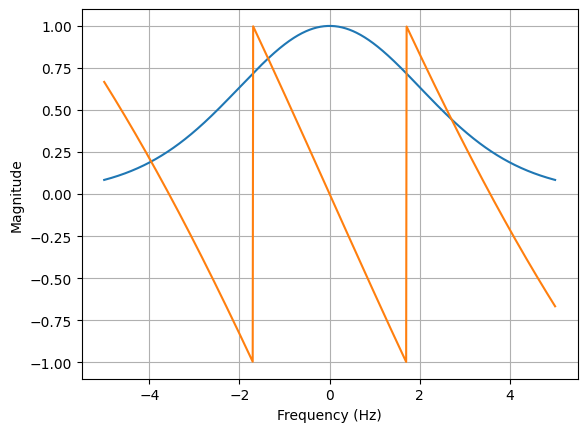

In [112]:
import matplotlib.pyplot as plt
# Create a transfer function with the coefficients using sympy poly

W = sp.symbols('W', real=True)
H = sp.Poly(num, s).subs(s, sp.I*W)/sp.Poly(den, s).subs(s, sp.I*W)

print('H = ', H)
evalH = sp.lambdify(W, H, 'numpy')

# evalH = sp.lambdify(s, H, 'numpy')
w = np.linspace(-5, 5, 1000)
mag = np.abs(evalH(w))
phase = np.angle(evalH(w), deg=True)

plt.plot(w, mag)
plt.plot(w, phase/(180.0))
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()